In [1]:
import numpy as np
import pandas as pd

# Set the random seed for reproducibility
np.random.seed(42)

# Number of samples
num_samples = 100000

# Generate synthetic features
Vdd = np.random.uniform(1.0, 3.3, num_samples)  # Supply voltage in volts
Vth = np.random.uniform(0.4, 1.2, num_samples)  # Threshold voltage in volts
Temperature = np.random.uniform(25, 125, num_samples)  # Temperature in Celsius
Load_Capacitance = np.random.uniform(1e-12, 1e-9, num_samples)  # Capacitance in Farads

# Define a simple function to calculate noise margin category
def calculate_noise_margin(Vdd, Vth, Temp, Cap):
    # This is a simplistic formula to simulate noise margin; in reality, it would be more complex
    margin = Vdd - Vth - (0.001 * Temp) - (Cap * 1e9)
    if margin > 2.0:
        return "High"
    elif margin > 1.0:
        return "Medium"
    else:
        return "Low"

# Apply the function to generate labels
Noise_Margin = np.array([calculate_noise_margin(vdd, vth, temp, cap)
                         for vdd, vth, temp, cap in zip(Vdd, Vth, Temperature, Load_Capacitance)])

# Create a DataFrame
data = pd.DataFrame({
    'Vdd': Vdd,
    'Vth': Vth,
    'Temperature': Temperature,
    'Load_Capacitance': Load_Capacitance,
    'Noise_Margin': Noise_Margin
})

# Display the first few rows
print(data.head())

# Save the dataset to a CSV file
data.to_csv('noise_margin_dataset.csv', index=False)

print("Dataset created and saved as 'noise_margin_dataset.csv'.")


/home/sahilsssingh5/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/sahilsssingh5/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


        Vdd       Vth  Temperature  Load_Capacitance Noise_Margin
0  1.861442  0.864623    53.258797      1.578969e-10          Low
1  3.186643  0.821577    70.867659      9.641326e-11         High
2  2.683586  0.680830    34.921550      1.388013e-10       Medium
3  2.376915  0.794570    69.683703      4.740159e-10       Medium
4  1.358843  0.692077    45.308135      8.846495e-10          Low
Dataset created and saved as 'noise_margin_dataset.csv'.


In [2]:
data

,Vdd,Vth,Temperature,Load_Capacitance,Noise_Margin
0,1.861442,0.864623,53.258797,1.578969e-10,Low
1,3.186643,0.821577,70.867659,9.641326e-11,High
2,2.683586,0.680830,34.921550,1.388013e-10,Medium
3,2.376915,0.794570,69.683703,4.740159e-10,Medium
4,1.358843,0.692077,45.308135,8.846495e-10,Low
...,...,...,...,...,...
99995,2.822301,0.897720,34.281066,7.503981e-10,Medium
99996,2.792282,0.903376,87.563144,2.732553e-10,Medium
99997,2.551243,0.553763,87.666166,5.760131e-10,Medium
99998,2.148729,0.922466,29.764994,8.934465e-10,Low


In [3]:
import numpy as np
import pandas as pd

# Set the random seed for reproducibility
np.random.seed(42)

# Number of samples
num_samples = 100000

# Generate synthetic features
Vdd = np.random.uniform(1.0, 3.3, num_samples)  # Supply voltage in volts
Vth = np.random.uniform(0.4, 1.2, num_samples)  # Threshold voltage in volts
Temperature = np.random.uniform(-40, 125, num_samples)  # Temperature in Celsius
Load_Capacitance = np.random.uniform(1e-12, 1e-9, num_samples)  # Capacitance in Farads

# Simplified assumptions for VOH, VOL, VIH, VIL
def calculate_voh(Vdd):
    return Vdd * np.random.uniform(0.8, 1.0)  # Typically close to Vdd

def calculate_vol(Vdd):
    return Vdd * np.random.uniform(0.0, 0.2)  # Typically close to 0

def calculate_vih(Vth, Vdd):
    return Vth + np.random.uniform(0.1, 0.3) * (Vdd - Vth)  # VIH depends on Vth and Vdd

def calculate_vil(Vth, Vdd):
    return Vth - np.random.uniform(0.1, 0.3) * (Vth)  # VIL depends on Vth

# Calculate noise margins
def calculate_noise_margins(Vdd, Vth, Temp, Cap):
    VOH = calculate_voh(Vdd)
    VOL = calculate_vol(Vdd)
    VIH = calculate_vih(Vth, Vdd)
    VIL = calculate_vil(Vth, Vdd)
    
    NMH = VOH - VIH
    NML = VIL - VOL
    
    return NMH, NML

# Generate the noise margins for all samples
noise_margins = np.array([calculate_noise_margins(vdd, vth, temp, cap)
                          for vdd, vth, temp, cap in zip(Vdd, Vth, Temperature, Load_Capacitance)])

# Split into NMH and NML
NMH, NML = noise_margins[:, 0], noise_margins[:, 1]

# Create a DataFrame
data = pd.DataFrame({
    'Vdd': Vdd,
    'Vth': Vth,
    'Temperature': Temperature,
    'Load_Capacitance': Load_Capacitance,
    'NMH': NMH,
    'NML': NML
})

# Display the first few rows
print(data.head())

# Save the dataset to a CSV file
data.to_csv('noise_margin_exact_dataset.csv', index=False)

print("Dataset created and saved as 'noise_margin_exact_dataset.csv'.")


        Vdd       Vth  Temperature  Load_Capacitance       NMH       NML
0  1.861442  0.864623     6.627015      1.578969e-10  0.845447  0.501578
1  3.186643  0.821577    35.681637      9.641326e-11  1.599359  0.536442
2  2.683586  0.680830   -23.629443      1.388013e-10  1.180831  0.057981
3  2.376915  0.794570    33.728109      4.740159e-10  1.304062  0.114934
4  1.358843  0.692077    -6.491577      8.846495e-10  0.261301  0.431610
Dataset created and saved as 'noise_margin_exact_dataset.csv'.


In [4]:
data

,Vdd,Vth,Temperature,Load_Capacitance,NMH,NML
0,1.861442,0.864623,6.627015,1.578969e-10,0.845447,0.501578
1,3.186643,0.821577,35.681637,9.641326e-11,1.599359,0.536442
2,2.683586,0.680830,-23.629443,1.388013e-10,1.180831,0.057981
3,2.376915,0.794570,33.728109,4.740159e-10,1.304062,0.114934
4,1.358843,0.692077,-6.491577,8.846495e-10,0.261301,0.431610
...,...,...,...,...,...,...
99995,2.822301,0.897720,-24.686242,7.503981e-10,1.493332,0.341326
99996,2.792282,0.903376,63.229188,2.732553e-10,0.983005,0.459999
99997,2.551243,0.553763,63.399174,5.760131e-10,1.095367,0.349151
99998,2.148729,0.922466,-32.137759,8.934465e-10,0.578162,0.578102


In [6]:
!pip install --upgrade pandas seaborn matplotlib


Looking in indexes: https://pypi.org/simple, https://packagecloud.io/github/git-lfs/pypi/simple
     |████████████████████████████████| 294 kB 1.3 MB/s eta 0:00:01
     |████████████████████████████████| 8.3 MB 2.4 MB/s eta 0:00:01
     |████████████████████████████████| 304 kB 3.2 MB/s eta 0:00:01
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.1
    Uninstalling matplotlib-3.5.1:
      Successfully uninstalled matplotlib-3.5.1
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 4.8.3 requires matplotlib<3.9,>=3.2, but you have matplotlib 3.9.1.post1 which is incompatible.


                 Vdd            Vth    Temperature  Load_Capacitance  \
count  100000.000000  100000.000000  100000.000000      1.000000e+05   
mean        2.148823       0.801064      42.603002      4.994725e-10   
std         0.663185       0.230953      47.653555      2.883348e-10   
min         1.000013       0.400004     -39.999621      1.002225e-12   
25%         1.573956       0.600574       1.299484      2.497354e-10   
50%         2.151448       0.801505      42.687360      4.984620e-10   
75%         2.723882       1.000329      83.822972      7.496565e-10   
max         3.299982       1.199992     124.996578      9.999946e-10   

                 NMH            NML  
count  100000.000000  100000.000000  
mean        0.862711       0.425887  
std         0.523604       0.240327  
min        -0.339969      -0.338120  
25%         0.449062       0.258219  
50%         0.846192       0.424514  
75%         1.253394       0.603920  
max         2.522875       1.065951  
Vdd      

OptionError: "No such keys(s): 'mode.use_inf_as_null'"

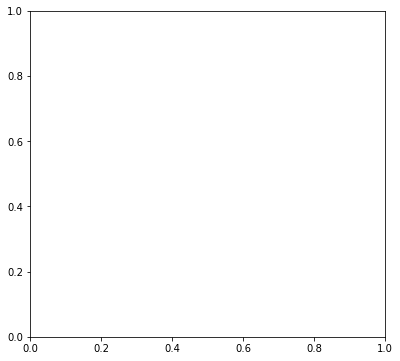

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('noise_margin_exact_dataset.csv')

# Display basic statistics
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Visualize the distribution of NMH and NML
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(data['NMH'], kde=True, color='blue')
plt.title('Distribution of NMH')

plt.subplot(1, 2, 2)
sns.histplot(data['NML'], kde=True, color='orange')
plt.title('Distribution of NML')

plt.show()

# Pairplot to visualize relationships
sns.pairplot(data[['Vdd', 'Vth', 'Temperature', 'Load_Capacitance', 'NMH', 'NML']])
plt.show()


In [ ]:
df = pd.read